In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
data = pd.read_csv('Google_train_data.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258,1258
unique,1258,NaN,NaN,NaN,1241,1240
top,1/3/2012,NaN,NaN,NaN,718.81,"3,686,400"
freq,1,NaN,NaN,NaN,2,2
mean,NaN,533.709833,537.880223,529.007409,NaN,NaN
std,NaN,151.904442,153.008811,150.552807,NaN,NaN
min,NaN,279.120000,281.210000,277.220000,NaN,NaN
25%,NaN,404.115000,406.765000,401.765000,NaN,NaN
50%,NaN,537.470000,540.750000,532.990000,NaN,NaN
75%,NaN,654.922500,662.587500,644.800000,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
data['Close'] = pd.to_numeric(data.Close,errors = 'coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [8]:
sc = MinMaxScaler(feature_range = (0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [9]:
X_train = []
Y_train = []
for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [10]:
x_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60)

In [11]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100 ,return_sequences  = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100 ,return_sequences  = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100 ,return_sequences  = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [12]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20
35/35 - 13s - loss: 0.0399 - 13s/epoch - 366ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0120 - 4s/epoch - 113ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0095 - 4s/epoch - 111ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0095 - 4s/epoch - 110ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0079 - 5s/epoch - 139ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0066 - 5s/epoch - 133ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0075 - 5s/epoch - 151ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0070 - 4s/epoch - 126ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0061 - 5s/epoch - 141ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0072 - 4s/epoch - 127ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0064 - 4s/epoch - 114ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0065 - 4s/epoch - 114ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0056 - 4s/epoch - 114ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0060 - 4s/epoch - 107ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0053 - 4s/epoch - 112ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0050 - 4s/epoch - 125ms/step
Epoch 17/20
35/

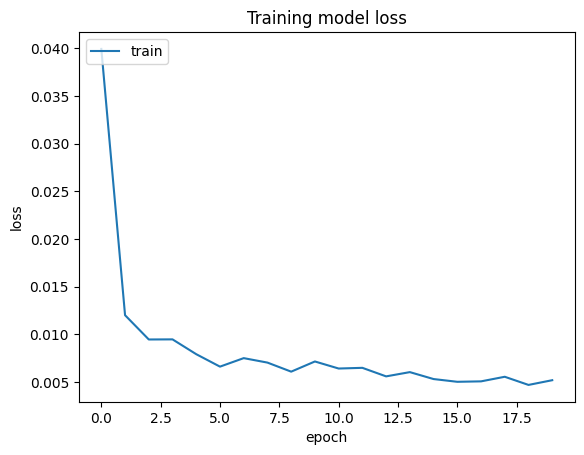

In [13]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [14]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"] = pd.to_numeric(testData.Close, errors = 'coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
Y_test = testData.iloc[60:,0:].values
inputclosing = testData.iloc[:,0:].values
inputclosing_scaled = sc.transform(inputclosing)
inputclosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputclosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [15]:
y_pred = model.predict(X_test)

6/6 [==============================] - 2s 50ms/step


In [16]:
y_pred

array([[1.1861427],
       [1.188699 ],
       [1.1992705],
       [1.2162898],
       [1.2326312],
       [1.2387528],
       [1.2327087],
       [1.219424 ],
       [1.2081659],
       [1.2024336],
       [1.1943755],
       [1.1827004],
       [1.171303 ],
       [1.1603587],
       [1.1552143],
       [1.1564062],
       [1.1701238],
       [1.1952841],
       [1.2273467],
       [1.262177 ],
       [1.2834888],
       [1.2898712],
       [1.2785726],
       [1.2548809],
       [1.228548 ],
       [1.208353 ],
       [1.1970782],
       [1.1901681],
       [1.1800151],
       [1.1675606],
       [1.154273 ],
       [1.1397526],
       [1.1199417],
       [1.0955956],
       [1.0817184],
       [1.0845749],
       [1.1009421],
       [1.1241214],
       [1.1496701],
       [1.1679573],
       [1.1857343],
       [1.2049029],
       [1.2256291],
       [1.2452629],
       [1.2602265],
       [1.2662964],
       [1.2610724],
       [1.253283 ],
       [1.2485483],
       [1.2499721],


In [17]:
predicted_price = sc.inverse_transform(y_pred)

In [18]:
predicted_price

array([[1002.38007],
       [1003.48175],
       [1008.0376 ],
       [1015.37225],
       [1022.41473],
       [1025.053  ],
       [1022.4482 ],
       [1016.72296],
       [1011.8712 ],
       [1009.4008 ],
       [1005.9281 ],
       [1000.8966 ],
       [ 995.9848 ],
       [ 991.2682 ],
       [ 989.05115],
       [ 989.5648 ],
       [ 995.47656],
       [1006.31964],
       [1020.1373 ],
       [1035.1478 ],
       [1044.3323 ],
       [1047.0829 ],
       [1042.2136 ],
       [1032.0035 ],
       [1020.6551 ],
       [1011.95184],
       [1007.09283],
       [1004.11487],
       [ 999.7393 ],
       [ 994.37195],
       [ 988.6455 ],
       [ 982.3878 ],
       [ 973.8501 ],
       [ 963.3579 ],
       [ 957.3774 ],
       [ 958.60846],
       [ 965.66205],
       [ 975.65137],
       [ 986.66187],
       [ 994.5429 ],
       [1002.20404],
       [1010.46497],
       [1019.39716],
       [1027.8585 ],
       [1034.3073 ],
       [1036.9231 ],
       [1034.6718 ],
       [1031.

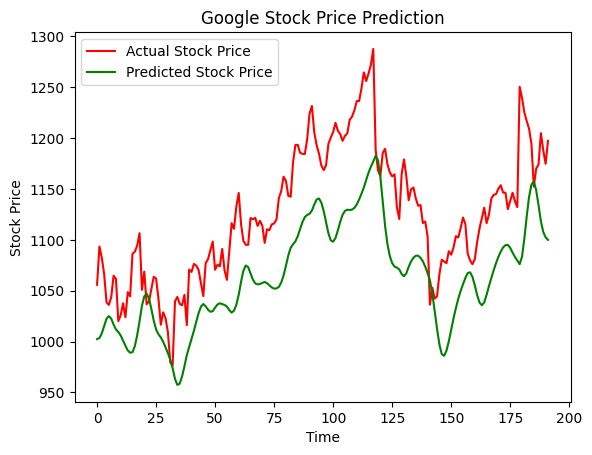

In [19]:
plt.plot(Y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()